In [2]:
!python3 ../Datasets/datasets.py

In [1]:
import sys
sys.path.append('../utils')
sys.path.append('../Datasets')
sys.path.append('../models')

AUD_DIR = '../../audioData/sythenticSoundscenes/train/'
CSV_DIR = '../Datasets/'

import audio_utils
import datasets
import os
import models
import torch
import pandas as pd
import numpy as np
import librosa
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim


In [3]:
csv_file = os.path.join(CSV_DIR, 'scrapper_train_dataset.csv')
scrapper_df = pd.read_csv(csv_file)

scrapper_dataset = datasets.scraperDataset(csv_file, AUD_DIR, only_scene=True)

In [4]:
trainloader = DataLoader(scrapper_dataset, batch_size=32, shuffle=True)

In [16]:
rand = torch.rand(1,40,1501)

enc = nn.Sequential(
    nn.Conv2d(1, 100, kernel_size=3, stride=2, padding=1),
    nn.LeakyReLU(),

    nn.Conv2d(100, 50, kernel_size=3, stride=2, padding=1),
    nn.LeakyReLU(),

    nn.Conv2d(50, 25, kernel_size=3, stride=2, padding=1),
    nn.LeakyReLU(),

    nn.Conv2d(25, 5, kernel_size=3, stride=2, padding=1),
    nn.LeakyReLU()
    )

dec = nn.Sequential(
    nn.ConvTranspose2d(5, 25, kernel_size=(2,2), stride=2, padding=0),
    nn.LeakyReLU(),

    nn.ConvTranspose2d(25, 50, kernel_size=(2,2), stride=2, padding=0),
    nn.LeakyReLU(),

    nn.ConvTranspose2d(50, 100, kernel_size=(2,2), stride=2, padding=(1,0)),
    nn.LeakyReLU(),

    nn.ConvTranspose2d(100, 1, kernel_size=(2,3), stride=2, padding=2),
    nn.LeakyReLU()
    )

rand.shape, dec(enc(rand)).shape

(torch.Size([1, 40, 1501]), torch.Size([1, 40, 1501]))

In [17]:
#random = torch.rand([1,40,1501])

device = 'cuda:3'
model = models.logmelAE_30secs()
model = model.to(device)

loss_fn = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [18]:
def train(epoch):
    print('\n Epoch: %d' % epoch)
    model.train()
    train_loss = 0

    for idx, inputs in enumerate(trainloader):
        model.train()
        inputs = inputs.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = loss_fn(outputs, inputs)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        print(f'Epoch [{epoch+1}], Loss: {loss.item():.4f}')

In [19]:
epochs = 50
model = model.to(device)
for epoch in range(0,epochs):
    train(epoch)


 Epoch: 0
Epoch [1], Loss: 25.7659
Epoch [1], Loss: 26.4473
Epoch [1], Loss: 26.8409
Epoch [1], Loss: 26.9509
Epoch [1], Loss: 26.4919
Epoch [1], Loss: 25.4480
Epoch [1], Loss: 25.4988
Epoch [1], Loss: 25.9166
Epoch [1], Loss: 25.5007
Epoch [1], Loss: 27.2528
Epoch [1], Loss: 27.7122
Epoch [1], Loss: 27.7713
Epoch [1], Loss: 26.1335
Epoch [1], Loss: 27.1604
Epoch [1], Loss: 25.6666
Epoch [1], Loss: 26.2629
Epoch [1], Loss: 26.5735
Epoch [1], Loss: 26.9372
Epoch [1], Loss: 26.1484
Epoch [1], Loss: 26.7399
Epoch [1], Loss: 25.4672
Epoch [1], Loss: 26.0444
Epoch [1], Loss: 26.7587
Epoch [1], Loss: 25.6489
Epoch [1], Loss: 24.8837
Epoch [1], Loss: 26.4410
Epoch [1], Loss: 25.7795
Epoch [1], Loss: 25.6440
Epoch [1], Loss: 23.6332
Epoch [1], Loss: 24.4691
Epoch [1], Loss: 22.8746
Epoch [1], Loss: 21.9786
Epoch [1], Loss: 19.6568
Epoch [1], Loss: 18.8568
Epoch [1], Loss: 16.0814
Epoch [1], Loss: 13.7403
Epoch [1], Loss: 10.5932
Epoch [1], Loss: 10.6315
Epoch [1], Loss: 12.1056
Epoch [1], Los

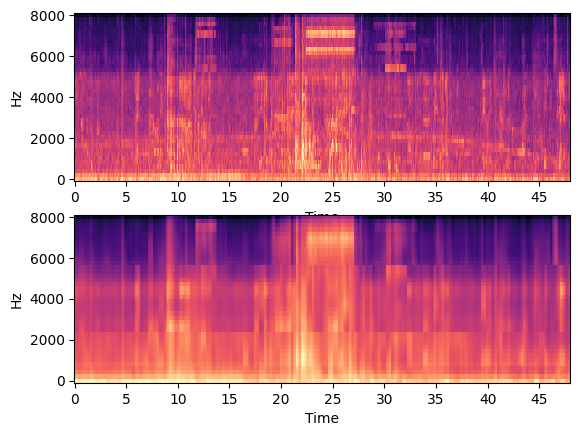

In [14]:
import librosa
import matplotlib.pyplot as plt

#rand = torch.rand([1,40,1501])
rand_aud = audio_utils.load_audio(os.path.join(AUD_DIR, scrapper_df['audio_fileNames'][169]))
rand = audio_utils.get_log_melSpectrogram(rand_aud)

model = model.cpu()
with torch.inference_mode():
    out = model(rand)

plt.subplot(2,1,1)
librosa.display.specshow(rand.squeeze().numpy(), x_axis='time', y_axis='linear', sr=16000)
plt.subplot(2,1,2)
librosa.display.specshow(out.squeeze().numpy(), x_axis='time', y_axis='linear', sr=16000)


In [55]:
import torchaudio
sam_file = os.path.join(AUD_DIR, scrapper_df['audio_fileNames'][0])

audio, sr = torchaudio.load(sam_file)
aud2 = audio_utils.load_audio(sam_file)
log_mel = audio_utils.get_log_melSpectrogram(aud2)

print(log_mel.shape)

kern = nn.Conv2d(1,5,3,2)
kern(log_mel).shape


torch.Size([1, 40, 1501])


torch.Size([5, 19, 750])

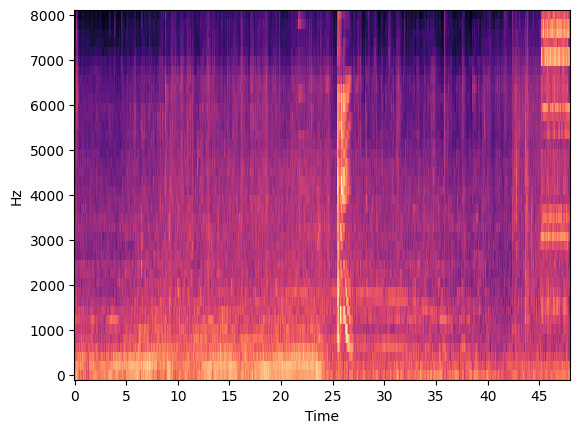

In [41]:
import librosa
import matplotlib.pyplot as plt

librosa.display.specshow(log_mel.squeeze().numpy(), x_axis="time", y_axis="linear", sr=16000)